# <center>TF-IDF vs Word2Vec </center>

In [24]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

with open('../models/metrics.json', 'r') as f:
    tfidf_metrics = json.load(f)
    
with open('../models/w2v_metrics.json', 'r') as f:
    w2v_metrics = json.load(f)


metrics = {
    "TF-IDF": tfidf_metrics["LogisticRegression"], # NaiveBayes
    "Word2Vec": w2v_metrics
}

## ROC Curve

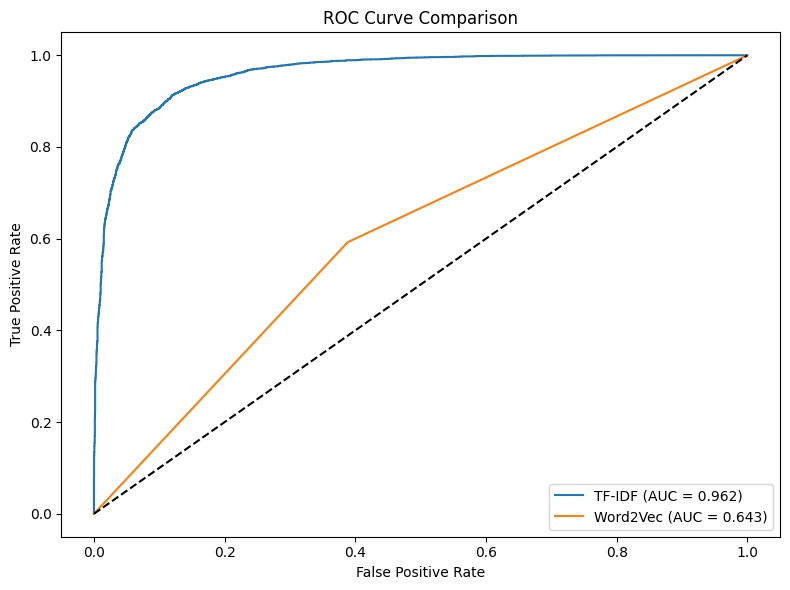

In [25]:
fpr_tfidf = tfidf_metrics["LogisticRegression"]["roc_curve"]["fpr"]
tpr_tfidf = tfidf_metrics["LogisticRegression"]["roc_curve"]["tpr"]
auc_tfidf = tfidf_metrics["LogisticRegression"]["roc_auc"]

fpr_w2v = w2v_metrics["roc_curve"]["fpr"]
tpr_w2v = w2v_metrics["roc_curve"]["tpr"]
auc_w2v = w2v_metrics["roc_auc"]

plt.figure(figsize=(8, 6))
plt.plot(fpr_tfidf, tpr_tfidf, label=f"TF-IDF (AUC = {auc_tfidf:.3f})")
plt.plot(fpr_w2v, tpr_w2v, label=f"Word2Vec (AUC = {auc_w2v:.3f})")
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/roc_comparison.png")
plt.show()

## Confusion Matrix



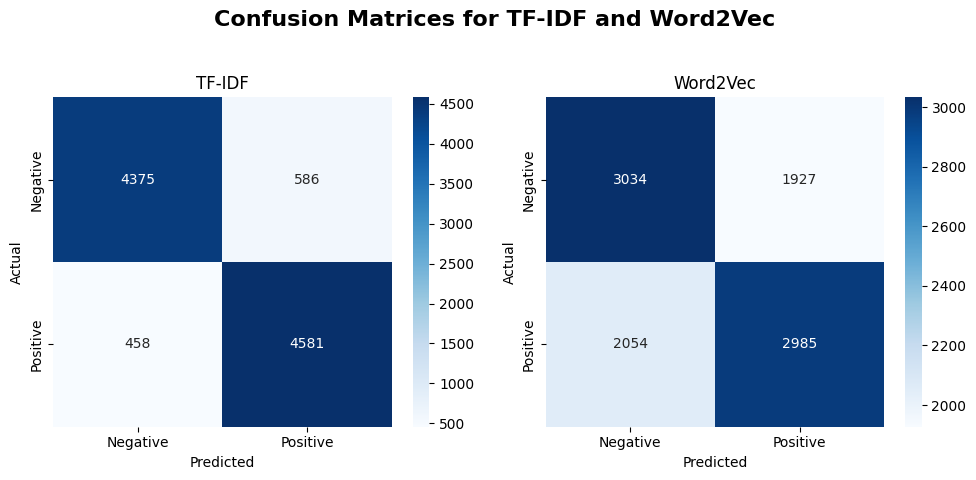

In [26]:
model_names = ["TF-IDF", "Word2Vec"]
labels = ["Negative", "Positive"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, name in enumerate(model_names):
    cm = np.array(metrics[name]["confusion_matrix"])
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_title(f"{name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.suptitle("Confusion Matrices for TF-IDF and Word2Vec", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("../plots/conf_matrix.png")
plt.show()


## Accuracy / ROC AUC

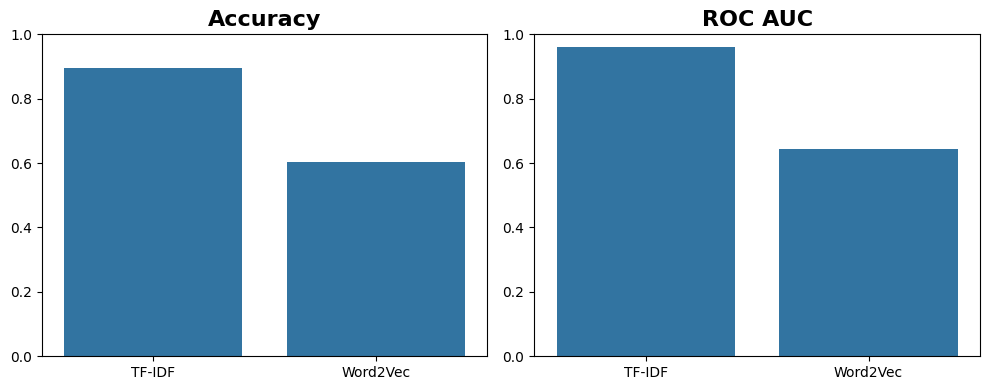

In [27]:
model_names = ["TF-IDF", "Word2Vec"]
accs = [metrics[m]["accuracy"] for m in model_names]
aucs = [metrics[m]["roc_auc"] for m in model_names]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=model_names, y=accs, ax=ax[0])
ax[0].set_title("Accuracy" , fontsize=16, fontweight='bold')
ax[0].set_ylim(0, 1)

sns.barplot(x=model_names, y=aucs, ax=ax[1])
ax[1].set_title("ROC AUC", fontsize=16, fontweight='bold')
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig("../plots/metric_comparison.png")
plt.show()
